# ANN(PyTorch) - Fashion MNIST dataset
* Project: To classify images of clothes
* Project Scope: Create, train and validate Neural Network on fashion MNIST dataset
* Author: Shashi Kiran Chilukuri

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import helper
import FMINST_model

# Define a transform 
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/data/', download=True, train=True, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/data/', download=True, train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

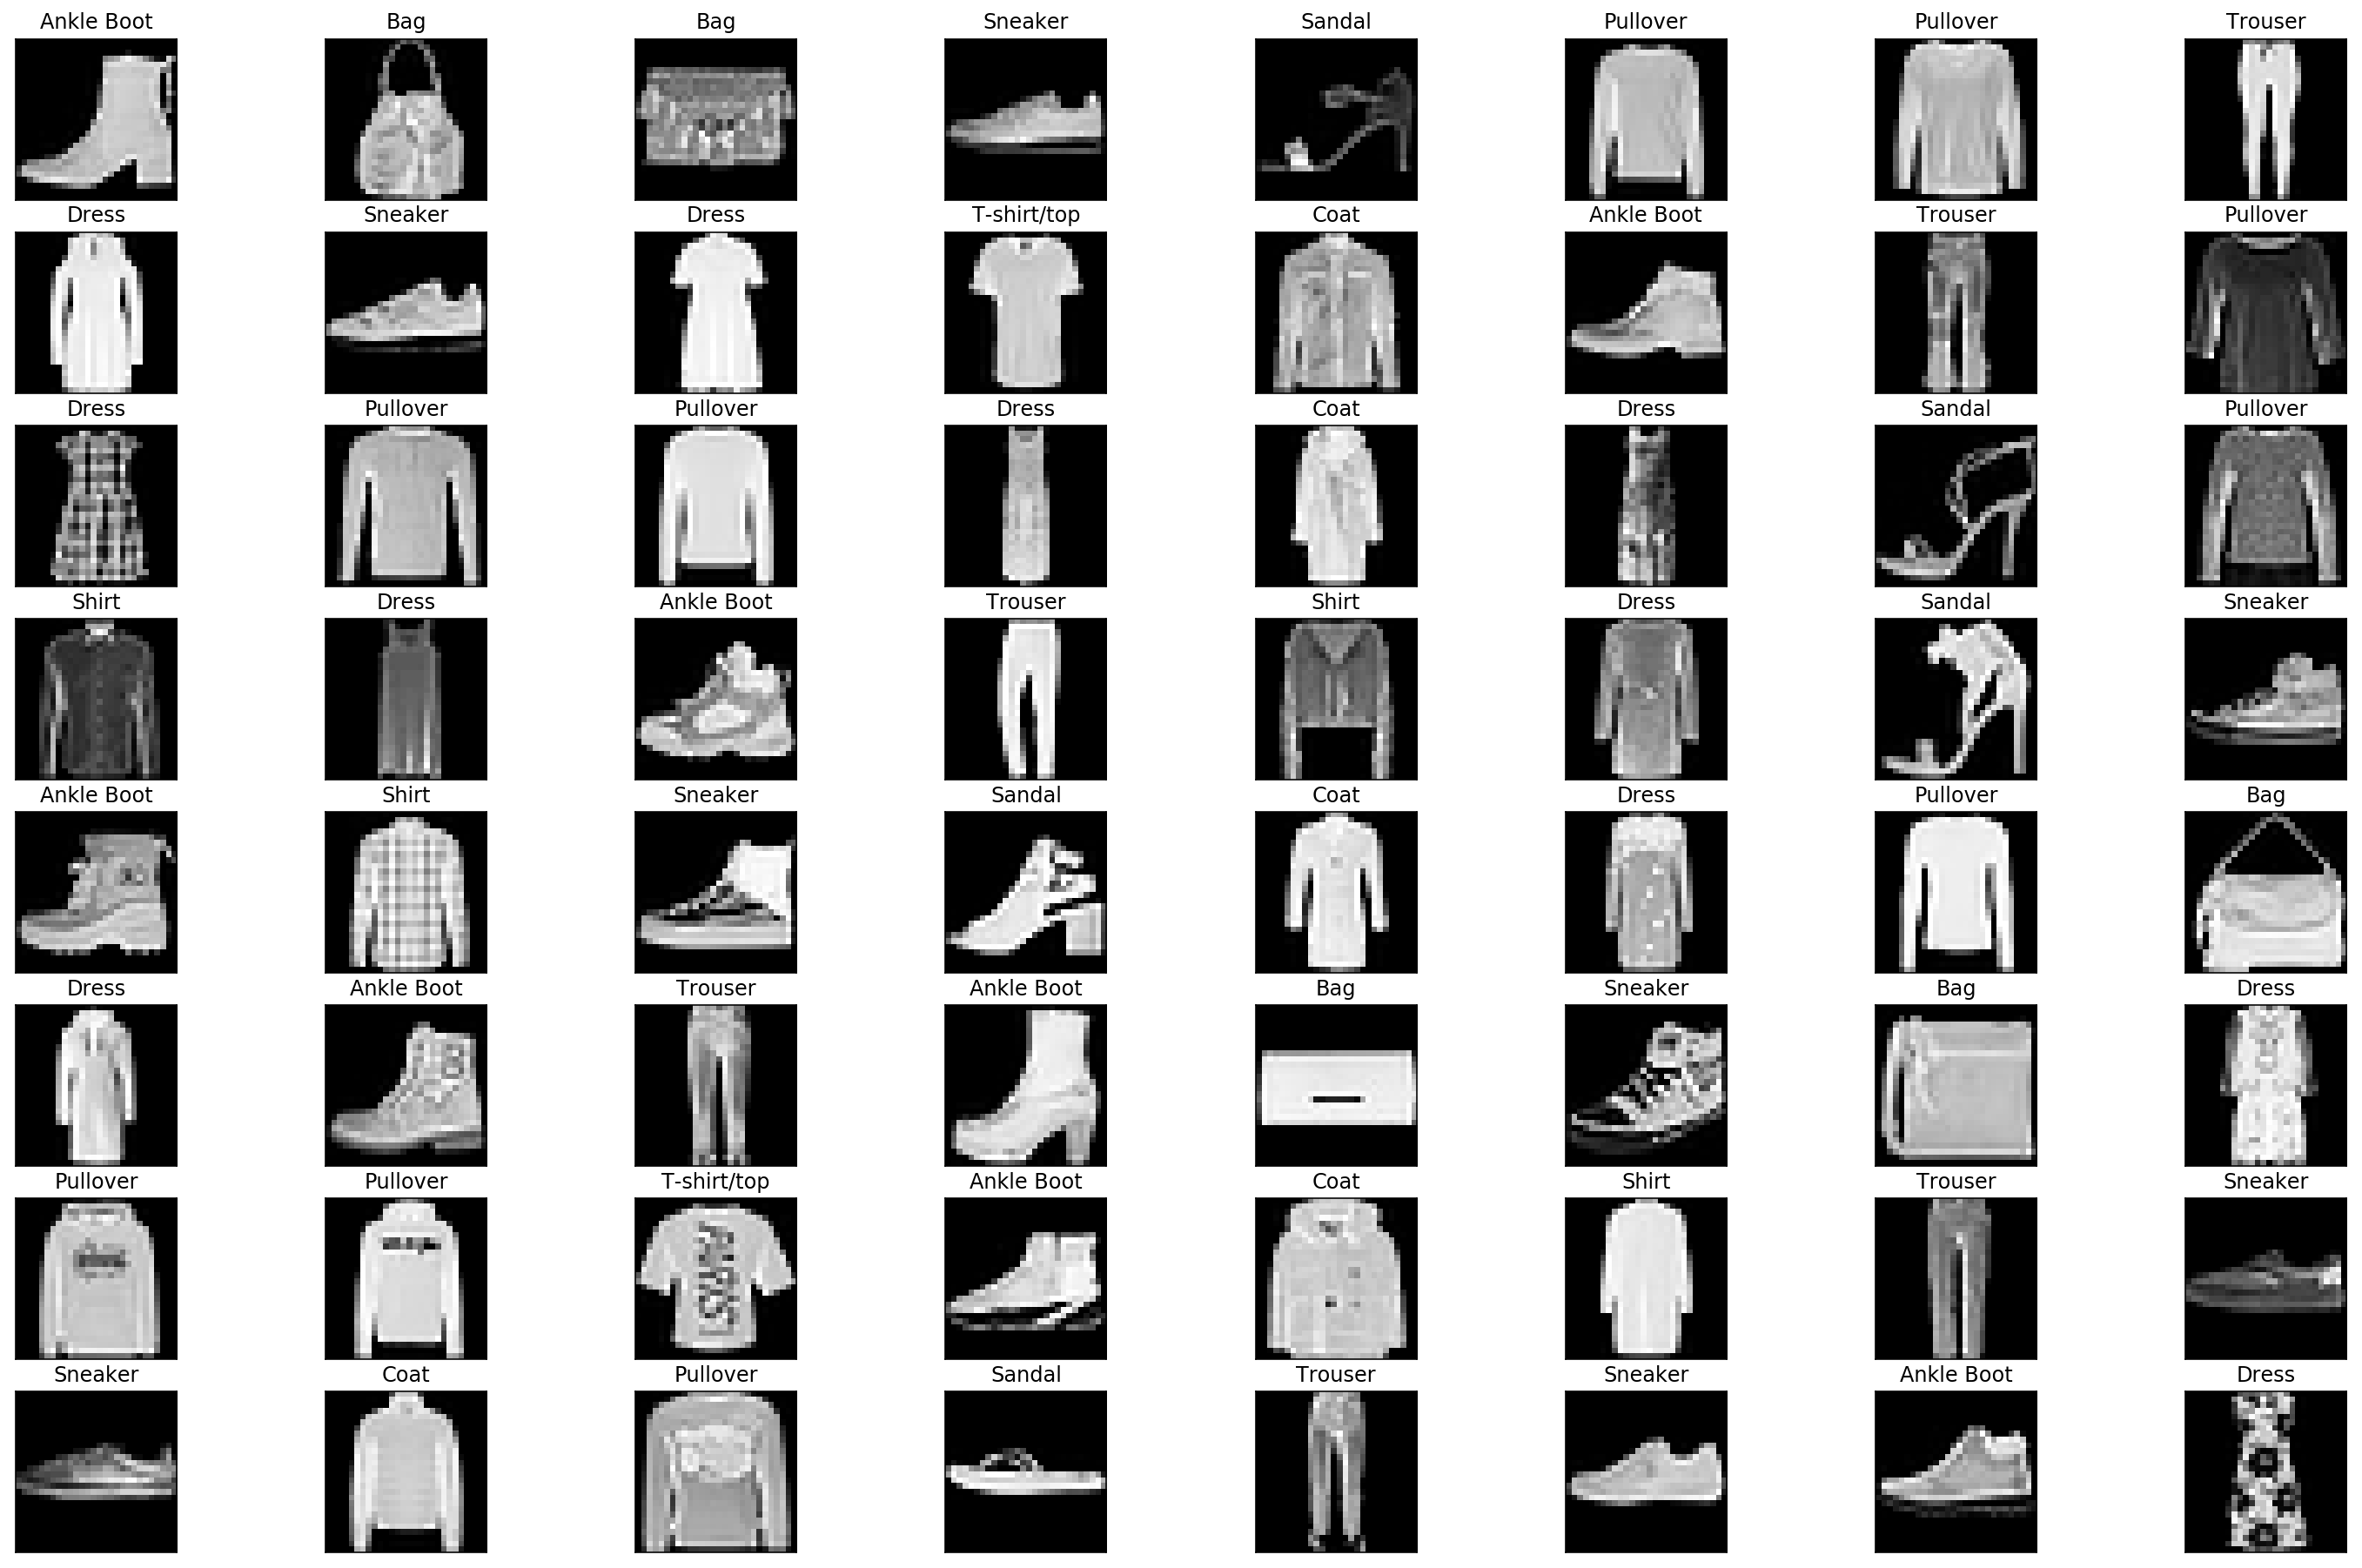

In [2]:
# Obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()
classes=['T-shirt/top','Trouser','Pullover','Dress','Coat',
         'Sandal','Shirt','Sneaker','Bag','Ankle Boot']

# Plotting images in the batch along with corresponding labels
fig = plt.figure(figsize =(25,16))
for idx in np.arange(64):
    a = fig.add_subplot(8, 8, idx+1, xticks=[], yticks=[])
    a.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor

In [3]:
# Create the network, criterion and optimizer

model = FMINST_model.Network(784, 10, [512, 256, 128])
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [4]:
FMINST_model.train(model, train_loader, test_loader, criterion, optimizer, epochs=50)

Epoch: 1/50..  Train Loss: 1.372..  Test Loss: 0.482..  Test Accuracy: 82.006
Epoch: 2/50..  Train Loss: 1.290..  Test Loss: 0.454..  Test Accuracy: 83.410
Epoch: 3/50..  Train Loss: 1.064..  Test Loss: 0.452..  Test Accuracy: 83.071
Epoch: 4/50..  Train Loss: 0.925..  Test Loss: 0.403..  Test Accuracy: 85.151
Epoch: 5/50..  Train Loss: 1.016..  Test Loss: 0.393..  Test Accuracy: 85.619
Epoch: 6/50..  Train Loss: 1.004..  Test Loss: 0.397..  Test Accuracy: 85.559
Epoch: 7/50..  Train Loss: 1.820..  Test Loss: 0.394..  Test Accuracy: 85.679
Epoch: 8/50..  Train Loss: 0.657..  Test Loss: 0.381..  Test Accuracy: 86.405
Epoch: 9/50..  Train Loss: 0.919..  Test Loss: 0.370..  Test Accuracy: 86.385
Epoch: 10/50..  Train Loss: 1.251..  Test Loss: 0.371..  Test Accuracy: 86.584
Epoch: 11/50..  Train Loss: 0.886..  Test Loss: 0.371..  Test Accuracy: 86.933
Epoch: 12/50..  Train Loss: 1.438..  Test Loss: 0.361..  Test Accuracy: 86.584
Epoch: 13/50..  Train Loss: 0.547..  Test Loss: 0.358..  Test

In [5]:
torch.save(model.state_dict(), 'f_mnist_checkpoint.pth')

In [6]:
# To load back..
model.load_state_dict(torch.load("f_mnist_checkpoint.pth"))